
{'pstring': '014/14/2/3', 'transimpedance': 727.2621911621392, 'Vpp': 0.004927079615255271, 'Ref_Vpp': 0.0, 'output_impedance': 291.38209297866723, 'current_bias': 0.8785819282317335}


'pstring' Pathstrings: '014/14/1/1' record name
 
'transimpedance': 738.6014767733689, slope (= dV/dI) 

'Vpp': 0.004890991306172068 high of function(max to zero)




In [1]:
import pickle as pkl



def getDict(file):
    with open(file,'rb') as f:
        SQUID_dict = pkl.load(f)
        print(type(SQUID_dict.keys()))
    return SQUID_dict

file_20230911_222403 = '20230911_222403_SQUIDParams.pkl'
file_20230919_212918 = '20230919_212918_SQUIDParams.pkl'
file_20230919_221550 = '20230919_221550_SQUIDParams.pkl'
file_20230919_234736 = '20230919_234736_SQUIDParams.pkl'
file_20230920_014329 = '20230920_014329_SQUIDParams.pkl'
file_20230920_031303 = '20230920_031303_SQUIDParams.pkl'

dict_20230911_222403 = getDict(file_20230911_222403)
dict_20230919_212918 = getDict(file_20230919_212918)
dict_20230919_221550 = getDict(file_20230919_221550)
dict_20230919_234736 = getDict(file_20230919_234736)
dict_20230920_014329 = getDict(file_20230920_014329)
dict_20230920_031303 = getDict(file_20230920_031303)



<class 'dict_keys'>
<class 'dict_keys'>
<class 'dict_keys'>
<class 'dict_keys'>
<class 'dict_keys'>
<class 'dict_keys'>


In [2]:
# get all same exictance keys in all dictionaries
#   to do that first, get turn all keys to sets
dict_20230911_222403_keys = set(dict_20230911_222403.keys())
dict_20230919_212918_keys = set(dict_20230919_212918.keys())
dict_20230919_221550_keys = set(dict_20230919_221550.keys())
dict_20230919_234736_keys = set(dict_20230919_234736.keys())
dict_20230920_014329_keys = set(dict_20230920_014329.keys())
dict_20230920_031303_keys = set(dict_20230920_031303.keys())

#   then get the intersection of all keys
same_keys = dict_20230911_222403_keys.intersection(
    dict_20230919_212918_keys, dict_20230919_221550_keys, dict_20230919_234736_keys,
    dict_20230920_014329_keys, dict_20230920_031303_keys)
#same_keys = dict_20230911_222403_keys&dict_20230919_212918_keys&dict_20230919_221550_keys\
#&dict_20230919_234736_keys&dict_20230920_014329_keys&dict_20230920_031303_keys  # same as above   
   
    

for sin like function:
    $$\frac{slop1}{slop2} = \frac{A1}{A2} $$

we want to compare the slope in the same amplitude
let's say we want the slope for 0.01Vpp 

range(0, 118)


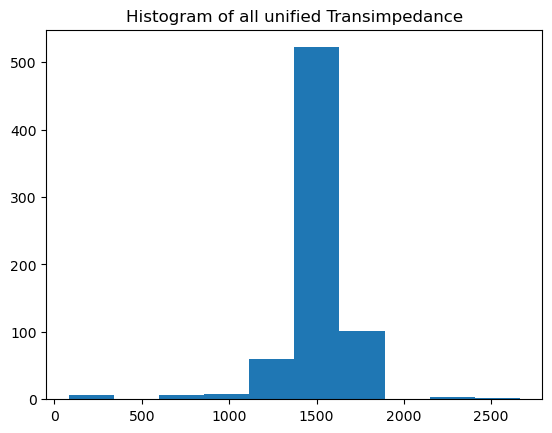

In [11]:
import numpy as np
import matplotlib.pyplot as plt

all_unifiedTrans = []

def getPString(dict):
    pstring = dict['pstring']
    return pstring

def getUnifiedTrans(dict):
    unified_Vpp = 0.01
    Trans = dict['transimpedance']
    Vpp = dict['Vpp']
    unified_Trans = unified_Vpp/Vpp*Trans
    return unified_Trans

print(range(len(same_keys)))
# save the same psting for same key in dictionary
for i in range(len(same_keys)): #limit 5 figures
    
    key = list(same_keys)[i]
    
    pstring_20230911_222403 = getPString(dict_20230911_222403[key])
    pstring_20230919_212918 = getPString(dict_20230919_212918[key])
    pstring_20230919_221550 = getPString(dict_20230919_221550[key])
    pstring_20230919_234736 = getPString(dict_20230919_234736[key])
    pstring_20230920_014329 = getPString(dict_20230920_014329[key])
    pstring_20230920_031303 = getPString(dict_20230920_031303[key])
    
    if not (pstring_20230911_222403 == pstring_20230919_212918 == pstring_20230919_221550 \
    == pstring_20230919_234736 == pstring_20230920_014329 == pstring_20230920_031303):
        
        print(f"pstring {i} is not the same for key: {key}")

    unifiedTrans_20230911_222403 = getUnifiedTrans(dict_20230911_222403[key])
    unifiedTrans_20230919_212918 = getUnifiedTrans(dict_20230919_212918[key])
    unifiedTrans_20230919_221550 = getUnifiedTrans(dict_20230919_221550[key])
    unifiedTrans_20230919_234736 = getUnifiedTrans(dict_20230919_234736[key])
    unifiedTrans_20230920_014329 = getUnifiedTrans(dict_20230920_014329[key])
    unifiedTrans_20230920_031303 = getUnifiedTrans(dict_20230920_031303[key])

    all_unifiedTrans.append(unifiedTrans_20230911_222403)
    all_unifiedTrans.append(unifiedTrans_20230919_212918)
    all_unifiedTrans.append(unifiedTrans_20230919_221550)
    all_unifiedTrans.append(unifiedTrans_20230919_234736)
    all_unifiedTrans.append(unifiedTrans_20230920_014329)
    all_unifiedTrans.append(unifiedTrans_20230920_031303)


    # all_unifiedTrans = [unifiedTrans_20230911_222403, 
    #                     unifiedTrans_20230919_212918, 
    #                     unifiedTrans_20230919_221550, 
    #                     unifiedTrans_20230919_234736, 
    #                     unifiedTrans_20230920_014329, 
    #                     unifiedTrans_20230920_031303]
    
    
plt.hist(all_unifiedTrans, bins=10)
plt.title("Histogram of all unified Transimpedance")
plt.show()


    


In [4]:
""" A way may can use for name
# Initialize an empty dictionary
keys = {}

# Loop and create dynamic key names with corresponding values
for i in range(3):  # Example range
    key_name = f"key{i}"  # Construct the key name
    keys[key_name] = i  # Assign the value

# Now keys dictionary has what you need
print(keys)
"""

' A way may can use for name\n# Initialize an empty dictionary\nkeys = {}\n\n# Loop and create dynamic key names with corresponding values\nfor i in range(3):  # Example range\n    key_name = f"key{i}"  # Construct the key name\n    keys[key_name] = i  # Assign the value\n\n# Now keys dictionary has what you need\nprint(keys)\n'